-----------------------------------------------------
# Indoor localization data 
http://archive.ics.uci.edu/ml/datasets/UJIIndoorLoc

## Classification Problem

#### Predict `actual building` and `floor identification`
-----------------------------------------------------

|Attribute |Information
|----------|-----------
|Attribute 001 (WAP001)| Intensity value for WAP001. Negative integer values from -104 to 0 and +100. Positive value 100 used if WAP001 was not detected.
|....|
|Attribute 520 (WAP520)| Intensity value for WAP520. Negative integer values from -104 to 0 and +100. Positive Vvalue 100 used if WAP520 was not detected.
|Attribute 521 (Longitude)| Longitude. Negative real values from -7695.9387549299299000 to -7299.786516730871000
|Attribute 522 (Latitude)| Latitude. Positive real values from 4864745.7450159714 to 4865017.3646842018.
|Attribute 523 (Floor)| Altitude in floors inside the building. Integer values from 0 to 4.
|Attribute 524 (BuildingID)| ID to identify the building. Measures were taken in three different buildings. Categorical integer values from 0 to 2.
|Attribute 525 (SpaceID)| Internal ID number to identify the Space (office, corridor, classroom) where the capture was taken. Categorical integer values.
|Attribute 526 (RelativePosition)| Relative position with respect to the Space (1 - Inside, 2 - Outside in Front of the door). Categorical integer values.
|Attribute 527 (UserID)| User identifier (see below). Categorical integer values.
|Attribute 528 (PhoneID)| Android device identifier (see below). Categorical integer values.
|Attribute 529 (Timestamp)| UNIX Time when the capture was taken. Integer value.


---------------------------------------------

| UserID | Anonymized user | Height (cm)  
|:---|:------------|:--------
|0 | USER0000 (Validation User)| N/A 
|1 | USER0001 | 170
|2 | USER0002 | 176
|3 | USER0003 | 172
|4 | USER0004 | 174
|5 | USER0005 | 184
|6 | USER0006 | 180
|7 | USER0007 | 160
|8 | USER0008 | 176
|9 | USER0009 | 177
|10| USER0010 | 186
|11| USER0011 | 176
|12| USER0012 | 158
|13| USER0013 | 174
|14| USER0014 | 173
|15| USER0015 | 174
|16| USER0016 | 171
|17| USER0017 | 166
|18| USER0018 | 162

----------------------------------------------

|PhoneID |Android Device |Android Ver. |UserID
|--------|---------------|-------------|-------
|0  | Celkon A27  | 4.0.4(6577) | 0
|1  | GT-I8160    | 2.3.6       | 8
|2  | GT-I8160    | 4.1.2       | 0
|3  | GT-I9100    | 4.0.4       | 5
|4  | GT-I9300    | 4.1.2       | 0
|5  | GT-I9505    | 4.2.2       | 0
|6  | GT-S5360    | 2.3.6       | 7
|7  | GT-S6500    | 2.3.6       | 14
|8  | Galaxy Nexus | 4.2.2      | 10
|9  | Galaxy Nexus | 4.3        | 0
|10 | HTC Desire HD| 2.3.5      | 18
|11 | HTC One      | 4.1.2      | 15
|12 | HTC One      | 4.2.2      | 0
|13 | HTC Wildfire S | 2.3.5    | 0,11
|14 | LT22i          | 4.0.4    | 0,1,9,16
|15 | LT22i          | 4.1.2    | 0
|16 | LT26i          | 4.0.4    | 3
|17 | M1005D         | 4.0.4    | 13
|18 | MT11i          | 2.3.4    | 4
|19 | Nexus 4        | 4.2.2    | 6
|20 | Nexus 4        | 4.3      | 0
|21 | Nexus S        | 4.1.2    | 0
|22 | Orange Monte Carlo | 2.3.5 | 17
|23 | Transformer TF101  | 4.0.3 | 2
|24 |bq Curie        | 4.1.1    | 12

----------------------------------------------

In [28]:
"""
 PART 1 
"""
import pandas
import numpy
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn import metrics
'''
 Read the training data
'''
train_data = pandas.read_csv('./UJIndoorLoc/trainingData.csv')
#print(train_data)
'''
Read the test data (Validation data)
'''
test_data = pandas.read_csv('./UJIndoorLoc/validationData.csv')
#print(test_data)

'''
Predictors
'''
all_columns = train_data.columns #gets all the columns
predictors = all_columns[:520].values.tolist() #truncate only the WAPxxx
#print(predictors)
columns_to_predict = all_columns[522:524].values.tolist() #get Floor and BuildingID
#print(columns_to_predict)
#Predicting Floor
'''
Create an instance of the RandomForestClassifier
'''
classifier = RandomForestClassifier()

'''
Fit the data to predict floor
'''
classifier.fit(train_data[predictors], train_data[columns_to_predict[0]])

'''
Default Predictions
'''
indoor_predictions = classifier.predict(test_data[predictors])
print(metrics.accuracy_score(test_data[columns_to_predict[0]],\
indoor_predictions))

0.83798379838


In [26]:
def calculate_avgerage_accuracy(list):
    sum = 0
    for item in list:
        sum = sum + item
    return sum/(len(list))
#Test
#list = range(0,10)
#print(str(calculate_avgerage_accuracy(list)))

### Default Classifier
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

# Default Values (n_estimators=10)
Timestamp: 7:11 PM Oct 30, 2016

|num| accuracy
|---|-----------
|1|0.830783078308
|2|0.836183618362
|3|0.839783978398
|4|0.836183618362
|5|0.828082808281
|6|0.836183618362
|7|0.829882988299
|8|0.832583258326
|9|0.845184518452
|10|0.84698469847
|11|0.829882988299
|12|0.843384338434
|13|0.834383438344
|14|0.830783078308
|15|0.827182718272
|16|0.839783978398
|17|0.83798379838
|18|0.833483348335
|19|0.836183618362
|20|0.83798379838

In [29]:
calculate_avgerage_accuracy([0.830783078308, 0.836183618362, 0.839783978398, 0.836183618362, 0.828082808281,\
                            0.836183618362, 0.829882988299, 0.832583258326, 0.845184518452, 0.84698469847,\
                            0.829882988299, 0.843384338434, 0.834383438344, 0.830783078308, 0.827182718272,\
                            0.839783978398, 0.83798379838, 0.833483348335, 0.836183618362, 0.83798379838])

0.8356435643566

In [118]:
'''
Create an instance of the RandomForestClassifier
'''
classifier = RandomForestClassifier(n_estimators=200)

'''
Fit the data to predict floor
'''
classifier.fit(train_data[predictors], train_data[columns_to_predict[0]])

'''
Predictions
'''

indoor_predictions = classifier.predict(test_data[predictors])
print(metrics.accuracy_score(test_data[columns_to_predict[0]],\
indoor_predictions))

0.875787578758


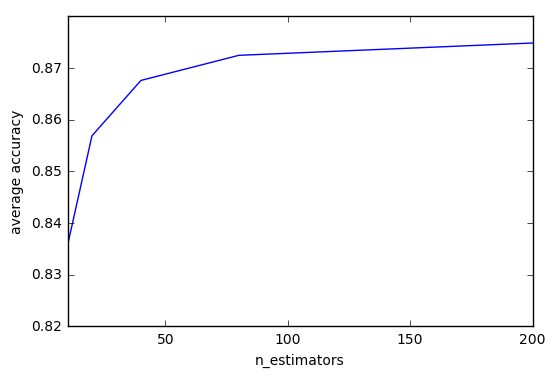

In [126]:
'''
Plot
'''
import matplotlib.pyplot as plt
%matplotlib inline

avg_accuracies = [0.8356435643566, 0.8568856885690002, 0.8675967596761002, 0.8724572457247002, 0.8748424842485502]
x_values = [10, 20, 40, 80, 200]
axes = [10, 200, 0.82, 0.88]


plt.plot(x_values, avg_accuracies)
plt.axis(axes)
plt.xlabel('n_estimators')
plt.ylabel('average accuracy')
plt.show()

# n_estimators=200
Timestamp: 7:49 PM Oct 30, 2016

|num|accuracy
|---|--------
|1|0.87398739874
|2|0.872187218722
|3|0.873087308731
|4|0.87398739874
|5|0.875787578758
|6|0.877587758776
|7|0.869486948695
|8|0.876687668767
|9|0.873087308731
|10|0.87398739874
|11|0.87398739874
|12|0.879387938794
|13|0.879387938794
|14|0.873087308731
|15|0.874887488749
|16|0.871287128713
|17|0.875787578758
|18|0.876687668767
|19|0.876687668767
|20|0.875787578758

In [119]:
calculate_avgerage_accuracy([0.87398739874, 0.872187218722, 0.873087308731, 0.87398739874, 0.875787578758,\
                            0.877587758776, 0.869486948695, 0.876687668767, 0.873087308731, 0.87398739874,\
                            0.87398739874, 0.879387938794, 0.879387938794, 0.873087308731, 0.874887488749,\
                            0.871287128713, 0.875787578758, 0.876687668767, 0.876687668767, 0.875787578758])

0.8748424842485502

# n_estimators=80
Timestamp: 7:41 PM Oct 30, 2016

|num|accuracy
|---|--------
|1|0.875787578758
|2|0.87398739874
|3|0.866786678668
|4|0.871287128713
|5|0.878487848785
|6|0.871287128713
|7|0.867686768677
|8|0.874887488749
|9|0.870387038704
|10|0.876687668767
|11|0.878487848785
|12|0.87398739874
|13|0.869486948695
|14|0.866786678668
|15|0.871287128713
|16|0.874887488749
|17|0.87398739874
|18|0.869486948695
|19|0.874887488749
|20|0.868586858686

In [95]:
calculate_avgerage_accuracy([0.875787578758, 0.87398739874, 0.866786678668, 0.871287128713, 0.878487848785,\
                            0.871287128713, 0.867686768677, 0.874887488749, 0.870387038704, 0.876687668767,\
                            0.878487848785, 0.87398739874, 0.869486948695, 0.866786678668, 0.871287128713,\
                            0.874887488749, 0.87398739874, 0.869486948695, 0.874887488749, 0.868586858686])

0.8724572457247002

# n_estimators=40
Timestamp: 7:35 PM Oct 30, 2016

|num|accuracy
|---|--------
|1|0.86498649865
|2|0.870387038704
|3|0.869486948695
|4|0.856885688569
|5|0.857785778578
|6|0.862286228623
|7|0.867686768677
|8|0.871287128713
|9|0.869486948695
|10|0.870387038704
|11|0.872187218722
|12|0.862286228623
|13|0.867686768677
|14|0.872187218722
|15|0.869486948695
|16|0.877587758776
|17|0.860486048605
|18|0.870387038704
|19|0.867686768677
|20|0.871287128713

In [72]:
calculate_avgerage_accuracy([0.86498649865, 0.870387038704, 0.869486948695, 0.856885688569, 0.857785778578,\
                            0.862286228623, 0.867686768677, 0.871287128713, 0.869486948695, 0.870387038704,\
                            0.872187218722, 0.862286228623, 0.867686768677, 0.872187218722, 0.869486948695,\
                            0.877587758776, 0.860486048605, 0.870387038704, 0.867686768677, 0.871287128713])

0.8675967596761002

# n_estimators=20
Timestamp: 7:28 PM, Oct 30, 2016

|num|accuracy
|---|--------
|1|0.85598559856
|2|0.858685868587
|3|0.854185418542
|4|0.852385238524
|5|0.846084608461
|6|0.858685868587
|7|0.861386138614
|8|0.858685868587
|9|0.856885688569
|10|0.865886588659
|11|0.860486048605
|12|0.858685868587
|13|0.865886588659
|14|0.860486048605
|15|0.846084608461
|16|0.863186318632
|17|0.850585058506
|18|0.85598559856
|19|0.863186318632
|20|0.844284428443

In [51]:
calculate_avgerage_accuracy([0.85598559856, 0.858685868587, 0.854185418542, 0.852385238524, 0.846084608461,\
                            0.858685868587, 0.861386138614, 0.858685868587, 0.856885688569, 0.865886588659,\
                            0.860486048605, 0.858685868587, 0.865886588659, 0.860486048605, 0.846084608461,\
                            0.863186318632, 0.850585058506, 0.85598559856, 0.863186318632, 0.844284428443])

0.8568856885690002